In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import cv2

import skimage
import sklearn
from skimage.feature import greycomatrix, greycoprops
from sklearn.cluster import KMeans

1.1 Load the image “breastXray.tif”. What is the original image size and hence how many 
blocks/regions are processed in the following steps? 

In [5]:
image = cv2.imread("./breastXray.tif", cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

norm_image = cv2.normalize(image, None, alpha=0, beta=15, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

image_size = image.shape;

BlocksX = int(image_size[1]/20)
BlocksY = int(image_size[0]/20)
Blocks = (BlocksY,BlocksX)

print('Original Image Size: ',image_size)
print('Image Size in Block units: ',Blocks)

AttributeError: 'NoneType' object has no attribute 'shape'

1.2  Determine the gray level co-occurrence matrix (GLCM) for each region/block using a position 
operator [Dx, Dy]. Choose a distance, e.g. D = 1, and extract the GLCM at four different directions 
[0°, 45°, 90°, 135°]. The number of gray levels should be set to 16. What is the size of one 
GLCM? 

In [6]:
region=[];

for i in range(0,image_size[0],20)  :
    row_arr = []
    for j in range(0,image_size[1],20):
        img=norm_image[i:(i+20),j:(j+20)];
        row_arr.append(img)
    region.append(row_arr)
region = np.asarray(region)

NameError: name 'image_size' is not defined

In [29]:
glcm_region = []

for i in range(region.shape[0]):
    glcm_row = []
    for j in range(region.shape[1]):
        glcm = greycomatrix(region[i,j],distances=[1], angles=[0,np.pi/4,np.pi/2, 3*np.pi/4], levels=16,symmetric=True);
        #glcm = glcm[:,:,0,0] #getting rid of last two dim
        glcm_row.append(glcm)
    glcm_region.append(glcm_row)
glcm_region = np.asarray(glcm_region)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):


In [30]:
print('Size of one GLCM: ',glcm_region.shape)

#size of one glcm is 16x16 but there are 28,24 second last is dimension of distances
#last value is dimension angles

Size of one GLCM:  (28, 24, 16, 16, 1, 4)


1.3.  Calculate the correlation, contrast, energy and homogeneity for each GLCM. Show processed 
images based on the descriptors, i.e. Correlation at four directions with D = 1, Contrast at four 
directions with D =1, etc., using subplots (see Figure 1). How many features did you extract? 
Comment on the differences between the different texture descriptors. 

In [3]:
props = ['correlation','contrast','energy','homogeneity']
props_list = []

for k in props:

    props_region = []

    for i in range(glcm_region.shape[0]):
        props_row = []
        for j in range(glcm_region.shape[1]):
            props_vlu = greycoprops(glcm_region[i,j],k)
            props_row.append(props_vlu)
        props_region.append(props_row)
    props_region =np.asarray(props_region)
    
    props_list.append(props_region)
props_list = np.asarray(props_list)

#props_list contains 4 28x24 matices. Each of this matrices have one prop
#property e.g. correlation. In this matrix is the property of one block


NameError: name 'glcm_region' is not defined

In [22]:
props_list.shape

(4, 28, 24, 1, 4)

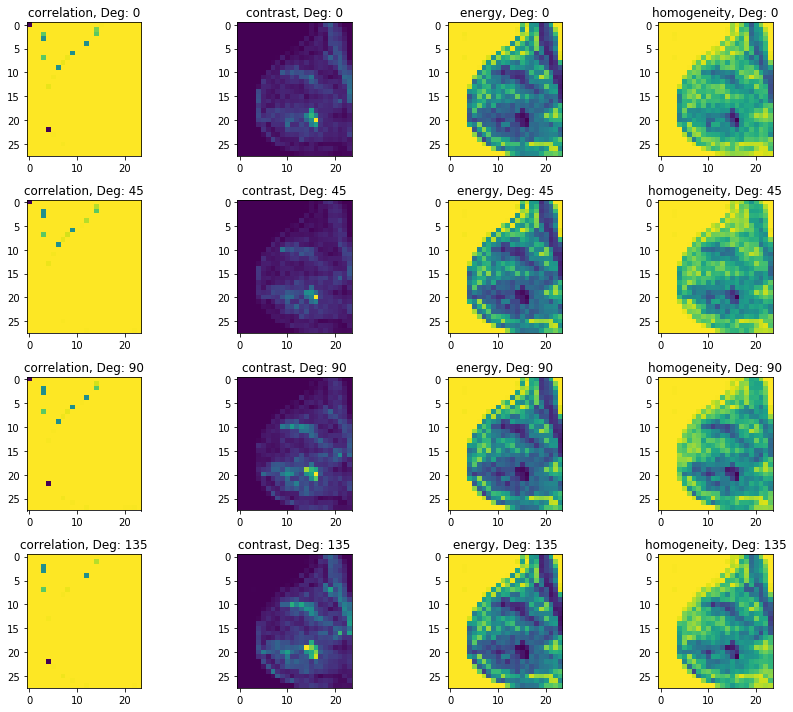

In [23]:
degree = [0,45,90,135]

fig,ax=plt.subplots(4,4,figsize=(12,10))
for i in range(props_list.shape[0]):
    for j in range(props_list.shape[4]):
        ax[i,j].imshow(props_list[j,:,:,0,i])
        ax[i,j].title.set_text(props[j]+", Deg: "+str(degree[i]))
fig.tight_layout()

1.4.  Build a design matrix based on your blocks where each block/region is an observation (sample) 
and the texture descriptors are the features. What is the size of your design matrix?  

In [1]:
design = []

for i in range(0,4):
    for j in range(0,4):
        liste = props_list[i,:,:,0,j].flatten()
        design.append(liste)
design = np.asarray(design)

NameError: name 'props_list' is not defined

In [2]:
design.shape

AttributeError: 'list' object has no attribute 'shape'

1.5.  (BONUS, 1 extra point) Try two different pixel distances D, e.g. 1 and 3, and show the processed 
images using subplots. Comment on the influence of the distance parameter. Decide for one of 
the two distances D to be used in the design matrix for the second part of the exercise. 

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):


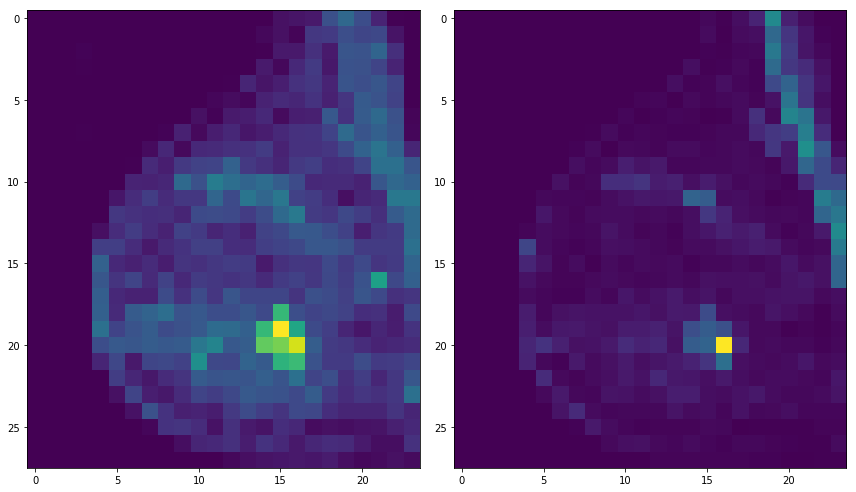

In [26]:
glcm_region_bonus = []

for i in range(region.shape[0]):
    glcm_row = []
    for j in range(region.shape[1]):
        glcm = greycomatrix(region[i,j],distances=[1,11], angles=[0], levels=16,symmetric=True);
        #glcm = glcm[:,:,0,0] #getting rid of last two dim
        glcm_row.append(glcm)
    glcm_region_bonus.append(glcm_row)
glcm_region_bonus = np.asarray(glcm_region_bonus)


props_region_bonus = []

for i in range(glcm_region.shape[0]):
    props_row = []
    for j in range(glcm_region.shape[1]):
        props_vlu = greycoprops(glcm_region_bonus[i,j],'contrast')
        props_row.append(props_vlu)
    props_region_bonus.append(props_row)
props_region_bonus =np.asarray(props_region_bonus)

fig,ax=plt.subplots(1,2,figsize=(12,10))
for i in range(props_region_bonus.shape[2]):
        ax[i].imshow(props_region_bonus[:,:,i,0,])
       
fig.tight_layout()


2.1.  Cluster the blocks represented by the design matrix using k-means clustering. Use k=4 and use 
at least 10 repeats for the initialization. 

In [27]:
X = np.transpose(design)
kmeans = KMeans(n_clusters=4).fit(X)

2.2 Visualize the blocks corresponding to the four different labels as an overlay to the original 
image, i.e. mask the original image with the labels found by the k-means algorithm. Which 
regions in the image were found? Describe the characteristics of the regions. 

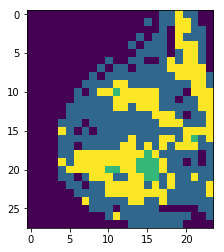

In [28]:
segm_img = kmeans.labels_.reshape((28,24))
plt.imshow(segm_img)

In [ ]:
newMtx=[]
colom = []

for i in range(segm_img.shape[0]):
    row = []
    for j in range(segm_img.shape[1]):
        
        for k in range(20):
            row.append(segm_img[i,j])
        
    for l in range(20):
        colom.append(row)
        
    newMtx.append(colom)

newMtx= np.asarray(colom)

plt.imshow(newMtx)

In [ ]:
plt.imsave('Segmentation.png',newMtx)

In [ ]:
norm_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_label = cv2.normalize(newMtx, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#norm_image = cv2.cvtColor(norm_image, cv2.COLOR_GRAY2BGR)

In [ ]:
added_image = cv2.addWeighted(norm_image,0.9,norm_label,0.4,0)
plt.imshow(added_image)

In [ ]:
plt.imsave('Overlay.png',added_image)